# 14. Correlation

## 설정

### 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [10]:
df = pd.read_csv('./data/11_1.CR.csv', encoding = 'cp949')
df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1.0,150750.0,7388.0,5.0,6.0,1959.0,2002.0,1063.0,624.0,1327.0,0.0,1.0,1.0,1.0
1,2.0,131500.0,4435.0,6.0,5.0,2003.0,2003.0,848.0,420.0,848.0,0.0,3.0,2.0,2.0
2,3.0,160000.0,8800.0,6.0,6.0,1964.0,1964.0,1251.0,461.0,1251.0,0.0,1.0,1.0,1.0
3,4.0,187500.0,13031.0,6.0,5.0,1995.0,1996.0,691.0,409.0,691.0,807.0,1.0,1.0,1.0
4,5.0,153900.0,7892.0,6.0,5.0,1993.0,1993.0,1199.0,530.0,1199.0,0.0,3.0,2.0,2.0


In [15]:
# 행, 열 개수 세기

df.shape

(1180, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      121 non-null    float64
 1   가격      121 non-null    float64
 2   연면적     121 non-null    float64
 3   품질      121 non-null    float64
 4   상태      121 non-null    float64
 5   건축년도    121 non-null    float64
 6   리모델링년도  121 non-null    float64
 7   지하면적    121 non-null    float64
 8   차고면적    121 non-null    float64
 9   면적_1층   121 non-null    float64
 10  면적_2층   121 non-null    float64
 11  주거유형    121 non-null    float64
 12  판매유형    121 non-null    float64
 13  판매조건    121 non-null    float64
dtypes: float64(14)
memory usage: 129.2 KB


## 상관분석


In [17]:
df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

In [22]:
columns = [['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층'],['가격']]

pg.pairwise_corr(df, columns=columns)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,연면적,가격,pearson,two-sided,121,0.895144,"[0.85, 0.93]",1.430389e-43,1.325e+40,1.000000
1,품질,가격,pearson,two-sided,121,0.397698,"[0.24, 0.54]",6.271452e-06,2706.922,0.995720
2,상태,가격,pearson,two-sided,121,-0.212236,"[-0.38, -0.04]",1.943663e-02,1.688,0.651579
3,건축년도,가격,pearson,two-sided,121,0.255337,"[0.08, 0.41]",4.705054e-03,5.884,0.812430
4,리모델링년도,가격,pearson,two-sided,121,0.163480,"[-0.02, 0.33]",7.318311e-02,0.555,0.435829
5,지하면적,가격,pearson,two-sided,121,0.350390,"[0.18, 0.5]",8.150373e-05,243.037,0.978787
6,차고면적,가격,pearson,two-sided,121,0.325337,"[0.16, 0.48]",2.714423e-04,79.393,0.957370
7,면적_1층,가격,pearson,two-sided,121,0.431133,"[0.27, 0.57]",7.947524e-07,1.92e+04,0.998927
8,면적_2층,가격,pearson,two-sided,121,0.011150,"[-0.17, 0.19]",9.033932e-01,0.115,0.051562


In [24]:
variables = ['가격','연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층']

df[variables].rcorr()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층
가격,-,***,***,*,**,,***,***,***,
연면적,0.895,-,***,,*,,***,***,***,
품질,0.398,0.346,-,,,,,,,***
상태,-0.212,-0.14,-0.088,-,***,*,*,,,
건축년도,0.255,0.2,0.121,-0.444,-,**,*,*,,**
리모델링년도,0.163,0.121,0.155,0.211,0.271,-,,,,
지하면적,0.35,0.352,-0.08,-0.212,0.188,-0.129,-,*,***,***
차고면적,0.325,0.41,0.082,-0.084,0.221,-0.032,0.223,-,***,*
면적_1층,0.431,0.508,-0.028,-0.145,0.008,-0.082,0.605,0.415,-,***
면적_2층,0.011,-0.02,0.317,-0.031,-0.251,0.101,-0.566,-0.225,-0.532,-


*** : 관계성 높음

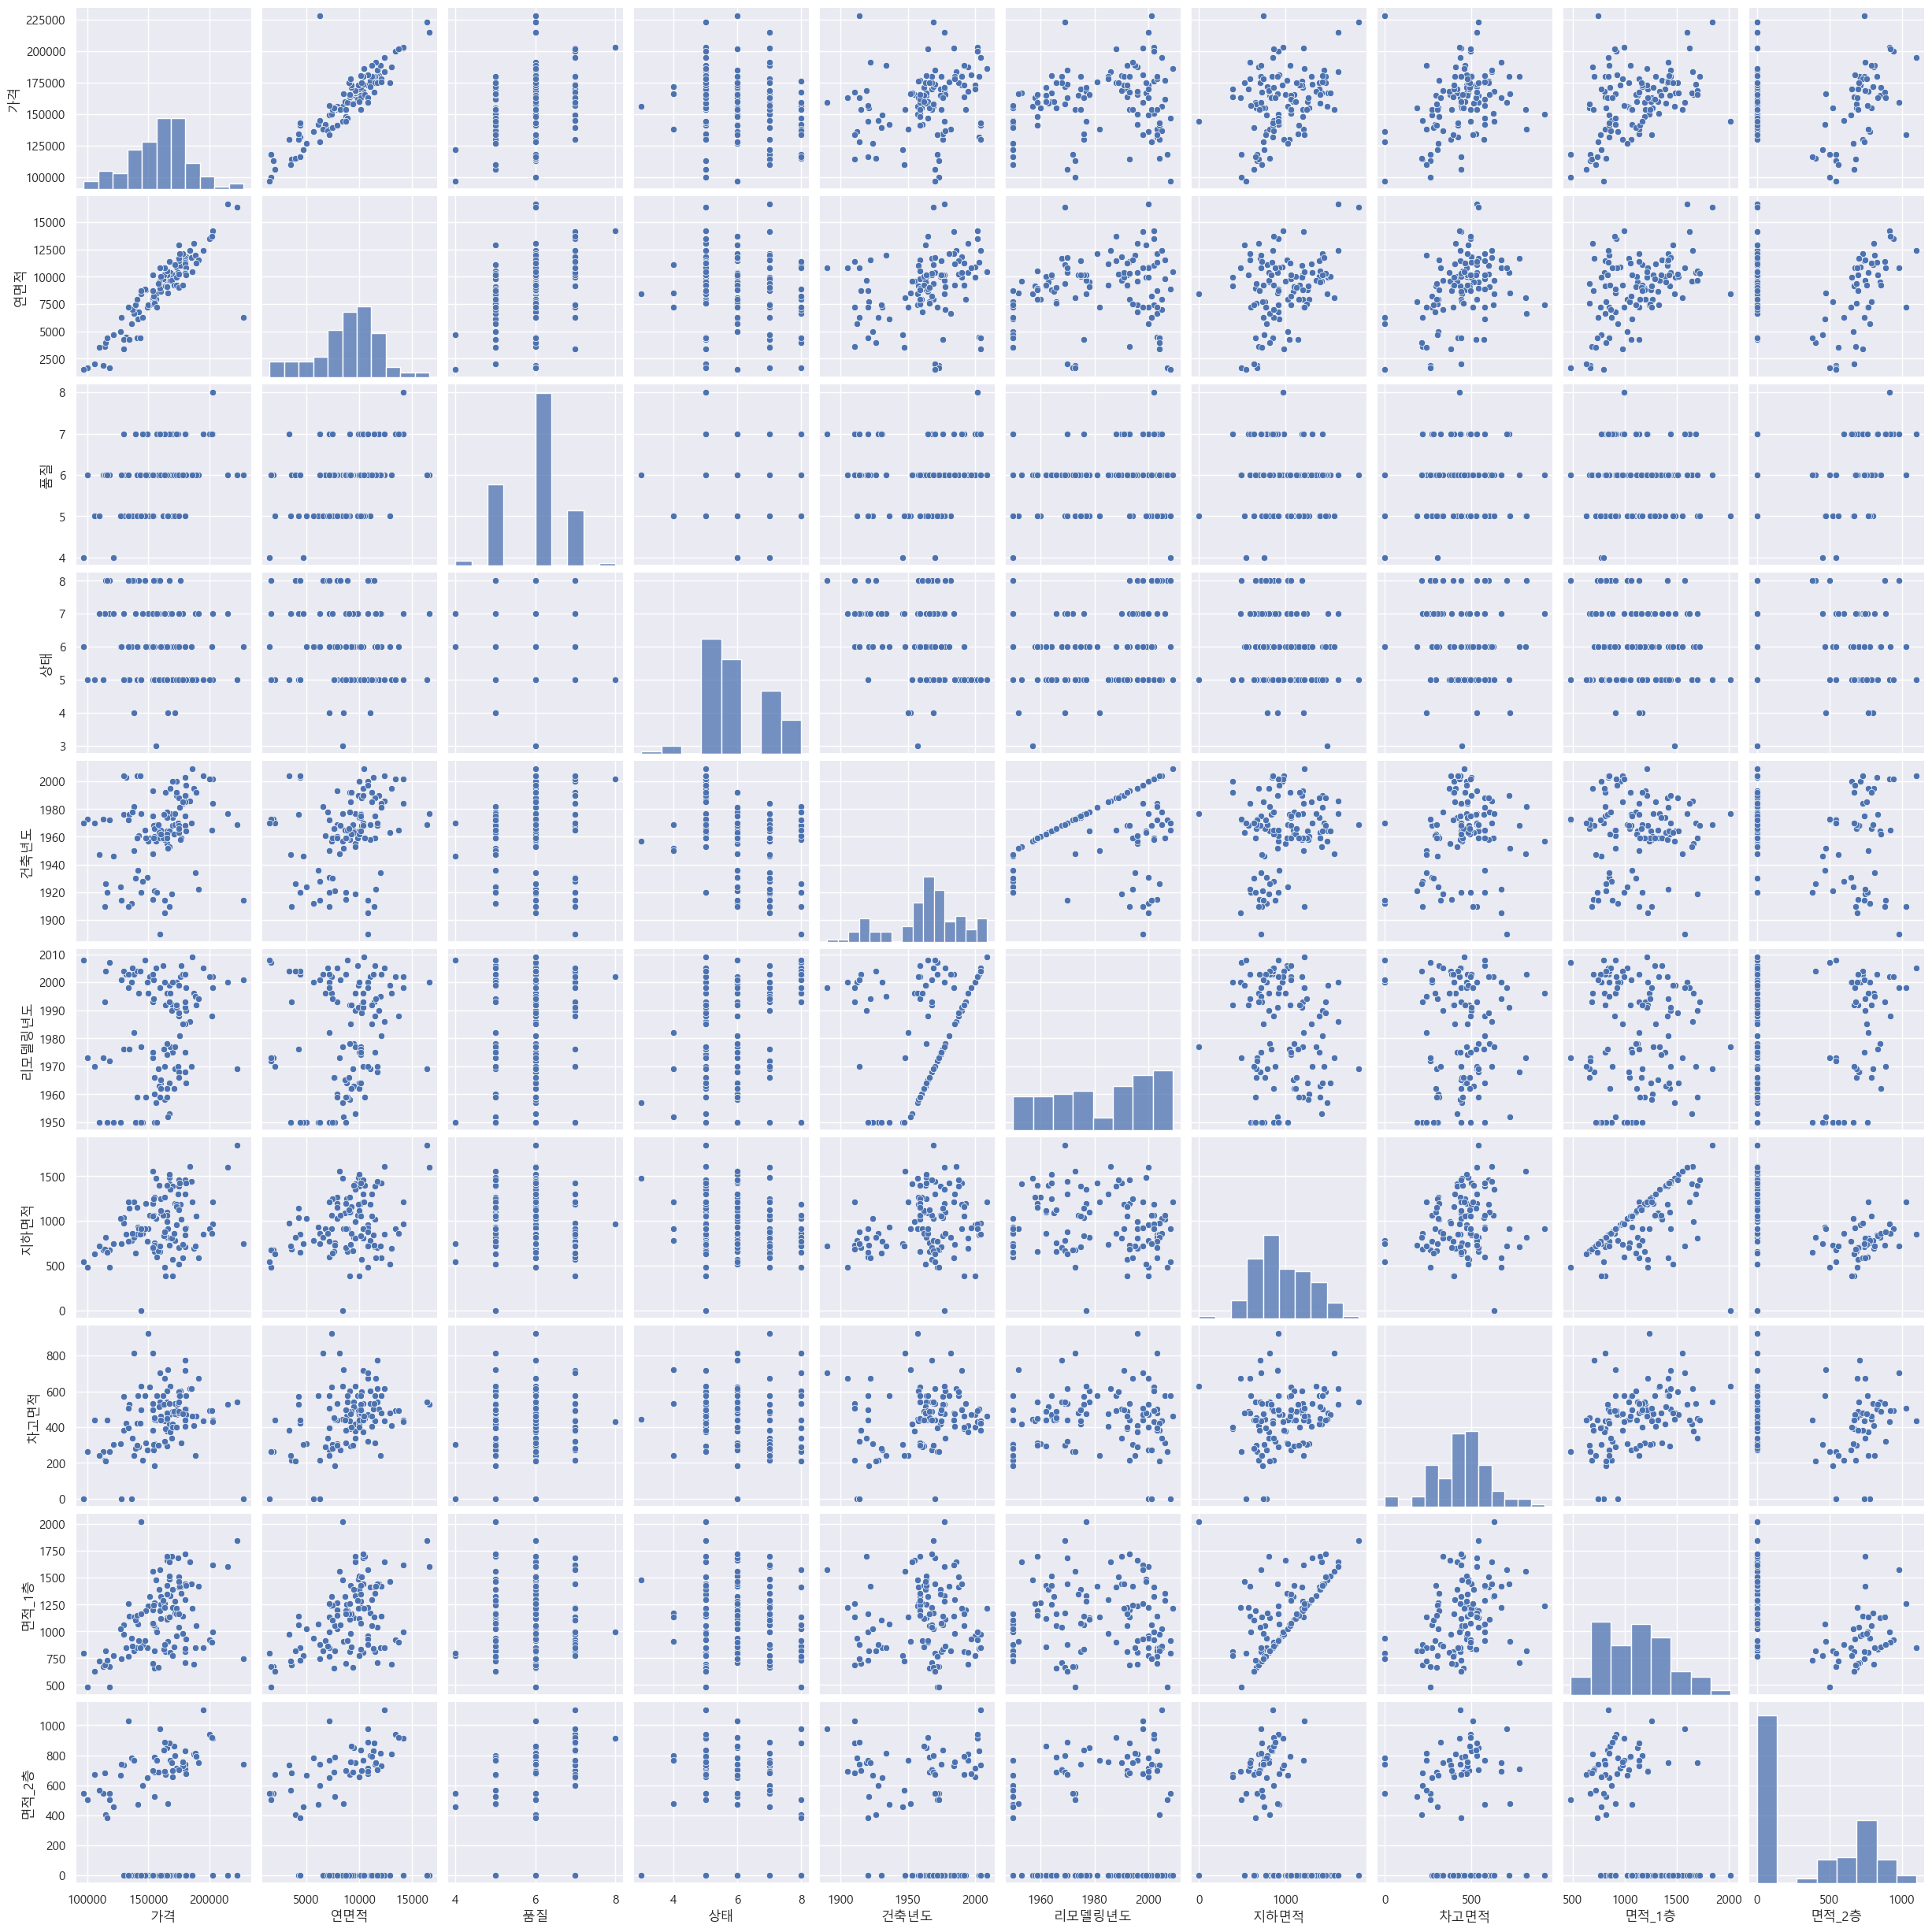

In [25]:
sns.pairplot(vars = variables,
             data = df)

plt.show()